In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [2]:
df = pd.read_pickle("dataframes/ex2_df_n_experts.pd")
df["gate"] = df["gate"].astype(str)
df

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
0,abalone,8,0.666890,0.664926,0.004174,0.012229,1,1,feature_importance_lr_max
1,abalone,8,0.681015,0.671486,0.008469,0.011352,1,2,feature_importance_lr_max
2,abalone,8,0.700694,0.692554,0.008900,0.011131,2,1,feature_importance_lr_max
3,abalone,8,0.733796,0.721811,0.008032,0.016548,2,2,feature_importance_lr_max
4,abalone,8,0.732664,0.725689,0.012988,0.023156,3,1,feature_importance_lr_max
...,...,...,...,...,...,...,...,...,...
475,students,11,0.756356,0.358250,0.019998,0.059910,8,2,None
476,students,11,0.734945,0.332065,0.028326,0.076616,9,1,None
477,students,11,0.767967,0.354394,0.020869,0.054827,9,2,None
478,students,11,0.741446,0.333326,0.029331,0.073222,10,1,None


In [18]:
#  ["abalone_input.pd","abalone_target.pd"], 
#  ["adult_input.pd","adult_target.pd"], # Large
#  ["banknote_input.pd","banknote_target.pd"], # Easy
#  ["bank_input.pd","bank_target.pd"], # Large
#  ["breast_cancer_input.np","breast_cancer_target.np"],
#  ["cars_input.pd","cars_target.pd"], 
#  ["contraceptive_input.pd","contraceptive_target.pd"], 
#  ["generated6_input.np","generated6_target.np"],
#  ["hrss_input.pd","hrss_target.pd"], # Large
#  ["iris_input.pd","iris_target.pd"],
#  ["steel_input.pd","steel_target.pd"],
#  ["students_input.pd","students_target.pd"],
#  #["sensorless_input.pd","sensorless_target.pd"], # Very Large dataset

#B97357 brown
#988ED5 violet

colormap = { 
    'iris_input.pd': "#8EBA42",
    'breast_cancer_input.np' : "#FBC15E" ,
    'cars_input.pd' : "#FBC15E",
    'abalone_input.pd': "#348ABD",
    'steel_input.pd': "#348ABD",
    'contraceptive_input.pd' : "#E24A33" ,
    'students_input.pd' : "#81D0DB",
    'banknote_input.pd' : "#81D0DB",
    'bank_input.pd' : "#B97357",
    'adult_input.pd' :"#E24A33",
    'hrss_input.pd' : "#8EBA42",   
    'generated6_input.np' : "grey",
}
datasets1 = [
            "banknote_input.pd", 
            "cars_input.pd", 
            "generated6_input.np",
            "hrss_input.pd",      
            "steel_input.pd",
            "contraceptive_input.pd", 

]
datasets2 = [           
            "iris_input.pd",
            "bank_input.pd",         
            "breast_cancer_input.np",          
            "adult_input.pd", 
            "abalone_input.pd", 
            "students_input.pd",
]

In [19]:
 df[(df.dataset ==  "iris") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
381,iris,4,0.963555,0.934566,0.007395,0.034369,1,2,None
383,iris,4,0.991111,0.959851,0.008412,0.030080,2,2,None
385,iris,4,0.996887,0.937162,0.004243,0.057376,3,2,None
387,iris,4,0.998661,0.946657,0.003188,0.026896,4,2,None
389,iris,4,0.997337,0.928129,0.004067,0.045341,5,2,None
391,iris,4,0.995994,0.945164,0.005252,0.037694,6,2,None
393,iris,4,0.998226,0.953272,0.003548,0.026581,7,2,None
395,iris,4,0.999558,0.930583,0.001929,0.037362,8,2,None
397,iris,4,0.997780,0.945306,0.003846,0.033374,9,2,None
399,iris,4,0.999111,0.941287,0.002667,0.039326,10,2,None


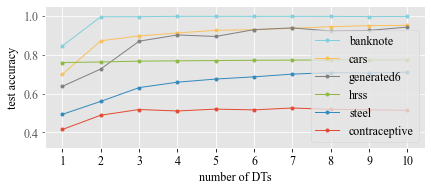

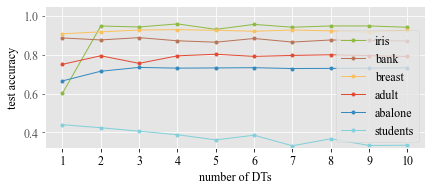

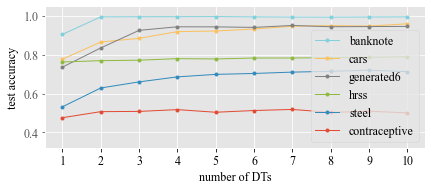

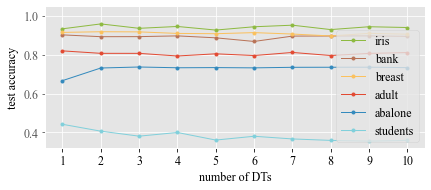

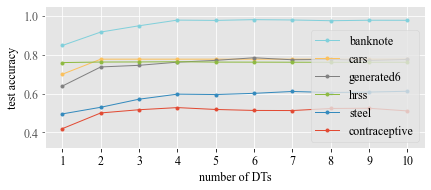

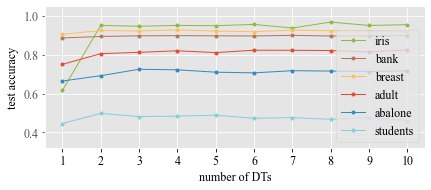

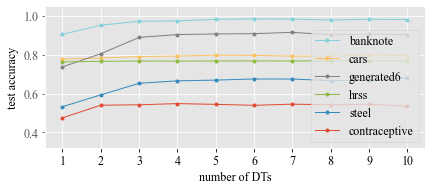

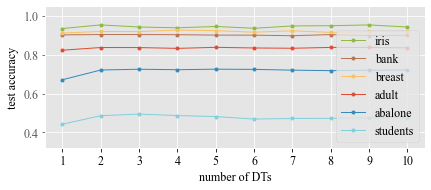

In [20]:
for gate in ["None","feature_importance_lr_max"]:
    for depth in [1,2]:
        first_set = True
        for datasets_chunk in [datasets1,datasets2]:
            if first_set:
                first_set = False
                chunk_name = "datasets1"
            else:
                chunk_name = "datasets2"
            for dataset in datasets_chunk:
                dataset_name = dataset.split("_")[0]

                slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
                fig = plt.gcf()
                fig.set_size_inches(6.8, 2.6)
                plt.xticks(df.n_experts.unique())
                plt.ylabel("test accuracy", fontsize=12)
                plt.xlabel("number of DTs", fontsize=12)
                #plt.title(str(gate) + " " + str(depth))
                ax = plt.gca()
                ax.set_ylim(0.32,1.05) 
                plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[dataset],label=dataset_name)
                ax.legend(loc="lower right")  
            #plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),chunk_name), bbox_inches="tight")
            plt.show()


In [6]:
colormap = {    
    1 : "#348ABD",
    2 : "#E24A33",
}

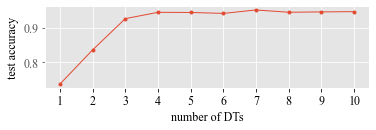

In [7]:
#Additional data set
for gate in ["None"]:
    for depth in [2]:
        dataset_name = "generated6"
        slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
        fig = plt.gcf()
        fig.set_size_inches(5.8, 1.5)
        plt.xticks(df.n_experts.unique())
        plt.ylabel("test accuracy", fontsize=12)
        plt.xlabel("number of DTs", fontsize=12)
        #plt.title(str(gate) + " " + str(depth))
        ax = plt.gca()
        #ax.set_ylim([0.3,1])    
        plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[depth])
        #ax.legend(loc="lower right")    
    #plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),"generated2"), bbox_inches="tight")
    plt.show()

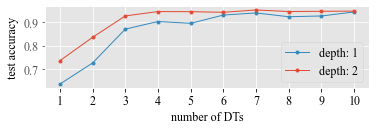

In [8]:
#Additional data set
for gate in ["None"]:
    for depth in [1,2]:
        dataset_name = "generated6"
        slice1 = df[(df.dataset ==  dataset_name) & (df.gate == gate) & (df.depth == depth)]
        fig = plt.gcf()
        fig.set_size_inches(5.8, 1.5)
        plt.xticks(df.n_experts.unique())
        plt.ylabel("test accuracy", fontsize=12)
        plt.xlabel("number of DTs", fontsize=12)
        #plt.title(str(gate) + " " + str(depth))
        ax = plt.gca()
        #ax.set_ylim([0.3,1])    
        plt.plot(slice1.n_experts,slice1.test,linewidth=1,linestyle='-',marker=".",color=colormap[depth],label= "depth: " + str(depth))
        ax.legend(loc="lower right")    
    #plt.savefig("plots/n_experts_{}_{}_{}.pdf".format(gate,str(depth),"generated"), bbox_inches="tight")
    plt.show()

In [9]:
df[(df.dataset ==  "generated6") & (df.gate == "None") & (df.depth == 2)]

,dataset,n_features,train,test,train_std,test_std,n_experts,depth,gate
301,generated6,2,0.740653,0.73672,0.003701,0.011285,1,2,None
303,generated6,2,0.839987,0.83584,0.014238,0.017211,2,2,None
305,generated6,2,0.931200,0.92664,0.031011,0.030831,3,2,None
307,generated6,2,0.952480,0.94504,0.011420,0.014808,4,2,None
309,generated6,2,0.953093,0.94460,0.011014,0.016606,5,2,None
311,generated6,2,0.949067,0.94188,0.013497,0.014634,6,2,None
313,generated6,2,0.959147,0.95184,0.012658,0.013012,7,2,None
315,generated6,2,0.953880,0.94520,0.009765,0.014357,8,2,None
317,generated6,2,0.954253,0.94620,0.012632,0.014484,9,2,None
319,generated6,2,0.955880,0.94700,0.010573,0.013393,10,2,None
